<a href="https://colab.research.google.com/github/alex-smith-uwec/AI_Spring2025/blob/main/Romania_assignment_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import random
import string

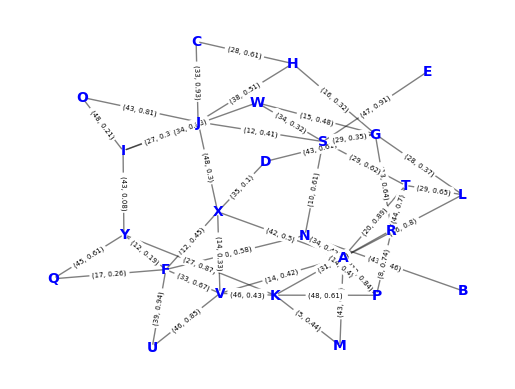

In [7]:
def generate_graph(num_nodes, edge_prob):
    graph = nx.Graph()
    # Generate labels A, B, C...
    nodes = [string.ascii_uppercase[i] for i in range(num_nodes)]
    graph.add_nodes_from(nodes)
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if random.random() < edge_prob:
                distance = random.randint(5, 50)
                prob = round(random.uniform(0.05, 1), 2)
                graph.add_edge(nodes[i], nodes[j], label=(distance, prob)) # Store edge label as a tuple
    return graph


# Generate the graph with 25 nodes and edge probability of 0.15
graph = generate_graph(25, 0.15)


#Plot the graph
pos = nx.kamada_kawai_layout(graph) # positions for all nodes

# nodes
nx.draw_networkx_nodes(graph, pos, node_size=10, node_color="white")

# edges
nx.draw_networkx_edges(graph, pos, alpha=0.5)

# labels
nx.draw_networkx_labels(graph, pos, font_size=10,font_color="blue",font_weight="bold")

# Add edge labels
edge_labels = nx.get_edge_attributes(graph, 'label')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=5)

plt.axis("off")
plt.show()


In [9]:
# prompt: # prompt: Treat the first entry of the tuple for the edges as a distance and give me code for uniform cost search from a starting node to a goal node.

def uniform_cost_search(graph, start_node, goal_node):
    """
    Performs uniform cost search on a graph.

    Args:
        graph: The graph represented as a NetworkX graph object.
        start_node: The starting node.
        goal_node: The goal node.

    Returns:
        A tuple containing:
        - A list of nodes representing the path from the start node to the goal node.
        - The total cost of the path.
        Returns (None, None) if no path is found.
    """
    priority_queue = [(0, start_node, [start_node])]  # (cost, node, path)
    visited = set()

    while priority_queue:
        cost, current_node, path = heapq.heappop(priority_queue)

        if current_node == goal_node:
            return path, cost

        if current_node in visited:
            continue
        visited.add(current_node)

        for neighbor, edge_data in graph[current_node].items():
            edge_cost, probability = edge_data['label'] # Accessing the distance as the first element of the tuple
            new_cost = cost + edge_cost
            new_path = list(path)
            new_path.append(neighbor)
            heapq.heappush(priority_queue, (new_cost, neighbor, new_path))

    return None, None  # No path found


# Example usage (replace with your desired start and goal nodes):
start_node = 'A'
goal_node = 'Y'

path, cost = uniform_cost_search(graph, start_node, goal_node)

if path:
    print(f"Path from {start_node} to {goal_node}: {path}")
    print(f"Total cost: {cost}")
else:
    print(f"No path found from {start_node} to {goal_node}")


Path from A to Y: ['A', 'V', 'X', 'F', 'Y']
Total cost: 52


In [10]:
# prompt: # prompt: let us define wasted length as distance*(1-probability). I want to use a uniform cost approach to minimize wasted length as the agent goes from start to goal





def uniform_cost_search(graph, start_node, goal_node):
    priority_queue = [(0, start_node, [start_node])]  # (wasted_length, node, path)
    visited = set()

    while priority_queue:
        wasted_length, current_node, path = heapq.heappop(priority_queue)

        if current_node == goal_node:
            return path, wasted_length

        if current_node in visited:
            continue
        visited.add(current_node)

        for neighbor, edge_data in graph[current_node].items():
            distance, probability = edge_data['label']
            new_wasted_length = wasted_length + distance * (1 - probability)
            new_path = list(path)
            new_path.append(neighbor)
            heapq.heappush(priority_queue, (new_wasted_length, neighbor, new_path))

    return None, None  # No path found


# Example usage
start_node = 'A'
goal_node = 'Y'

path, wasted_length = uniform_cost_search(graph, start_node, goal_node)

if path:
    print(f"Path from {start_node} to {goal_node}: {path}")
    print(f"Total wasted length: {wasted_length}")
else:
    print(f"No path found from {start_node} to {goal_node}")


Path from A to Y: ['A', 'P', 'R', 'K', 'Y']
Total wasted length: 21.62
